In [1]:
import pandas as pd

# import the database and asign column names

headers=["Title", "Author", "Pages", "Year", "Genres", "Rating", "Avr", "Link"]
df = pd.read_csv('database.csv', names=headers)

In [2]:
# generate tags list

tags = ((df.Genres.apply(lambda x: x[1:-1].strip("[]").replace("'", "").replace(" ", "").split(","))).explode().unique()).tolist()

In [3]:
# grab occurrences of nation based tags

nations = []

for tag in tags:
    if tag == 'classic-literature' or tag == 'european-literature' or tag == 'asian-literature': pass
    elif "-literature" in tag:
        occurrences = len([x for x in df['Genres'] if tag in x])
        data = [tag, occurrences]
        nations.append(data)
    else: pass

In [4]:
nations_df = pd.DataFrame(nations, columns = ['Tag', 'Occurrences'])

In [5]:
nations_df.sort_values(by=['Occurrences'], ascending=False)
nations_to_deploy = nations_df.sort_values(by=['Occurrences'], ascending=False).head(10)

In [6]:
import matplotlib.pyplot as plt

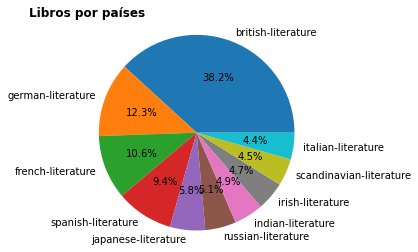

In [7]:
nations_data = nations_to_deploy['Occurrences']
nations_labels = nations_to_deploy['Tag']
plt.pie(nations_data,labels=nations_labels,autopct='%1.1f%%')
plt.title(label='Libros por países', fontweight='bold', loc='left')
plt.axis('equal')
plt.savefig('images/booksbycountry.png')
plt.show()

In [8]:
# grab occurrences of genre based tags

genres = []
genres_list = ['poetry', 'non-fiction', 'novels', 'drama', 'short-stories']

for tag in tags:
    if tag in genres_list:
        occurrences = len([x for x in df['Genres'] if tag in x])
        data = [tag, occurrences]
        genres.append(data)
    else: pass

In [9]:
genres_df = pd.DataFrame(genres, columns = ['Tag', 'Occurrences'])

genres_df.sort_values(by=['Occurrences'], ascending=False)
genres_to_deploy = genres_df.sort_values(by=['Occurrences'], ascending=False)

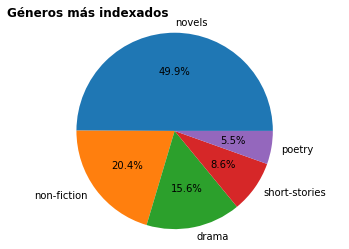

In [10]:
genres_data = genres_to_deploy['Occurrences']
genres_labels = genres_to_deploy['Tag']
plt.pie(genres_data,labels=genres_labels,autopct='%1.1f%%')

plt.title(label='Géneros más indexados', fontweight='bold', loc='left')
plt.savefig('images/booksbygenres.png')
plt.axis('equal')
plt.show()